# Pruebas de concepto de Prophet

https://vijayv500.medium.com/time-series-forecasting-using-facebooks-prophet-in-python-1e13ea20a52b

In [3]:
from pandas import read_csv
from matplotlib import pyplot

path = './data/AirPassengers.csv'
df = read_csv(path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [24]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


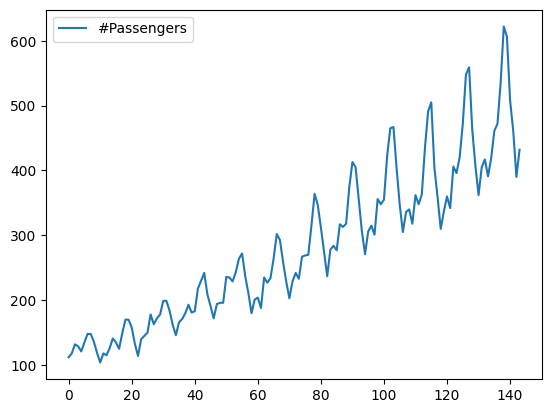

In [6]:
df.plot()
pyplot.show()
# X axis are months

## Fitting the model

In [8]:
# convert column to datetime object
from pandas import to_datetime

df.columns = ['ds', 'y']        # Fixed by prophet
df['ds'] = to_datetime(df['ds'])    # Force convert month to datetime object
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
from prophet import Prophet

model = Prophet()
model.fit(df)

10:23:44 - cmdstanpy - INFO - Chain [1] start processing
10:23:44 - cmdstanpy - INFO - Chain [1] done processing


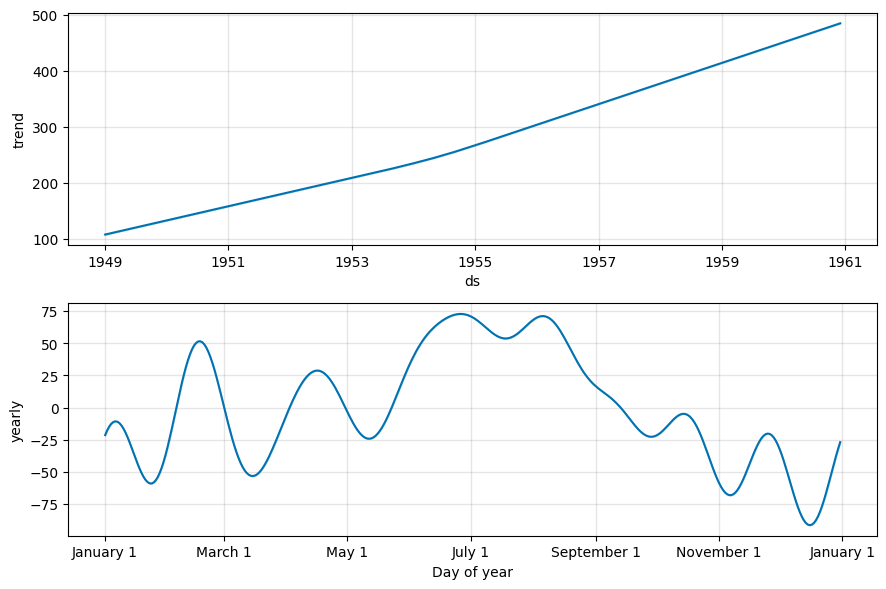

In [19]:
# Plotting number of passengers travelled is generally increasin and it peaks around July

model.plot_components(model.predict(df))
pyplot.show()

## Forecast on in-sample data

In [12]:
last_12months = df[132:]
forecast = model.predict(last_12months)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1960-01-01  426.190128  398.434405  452.851978
1 1960-02-01  419.170997  390.855559  447.013308
2 1960-03-01  454.777512  427.106175  483.447893
3 1960-04-01  455.970002  427.877493  482.915909
4 1960-05-01  458.561801  431.662322  487.905426


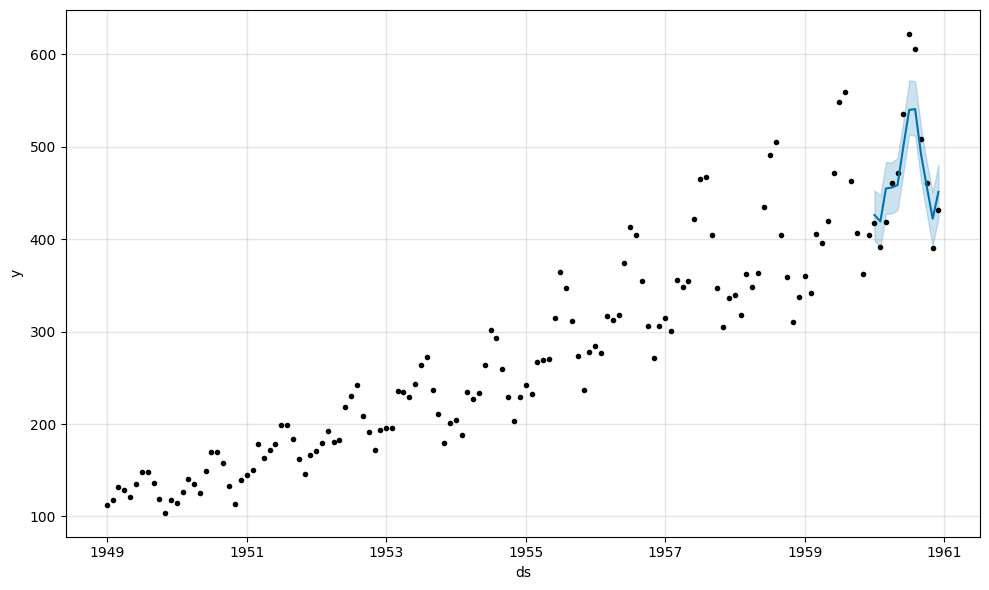

In [13]:
model.plot(forecast)
pyplot.show()

# dots -> training data
# blue -> forecast for last 12 months
# blue shaded -> upper and lower bounds (confidence)

## Forecast on out-of-sample data

In [15]:
future = model.make_future_dataframe(periods=12*5, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
199,1965-07-31,723.247756,693.732359,752.180387,656.297344,649.498232,663.013798
200,1965-08-31,677.355217,646.141584,706.024983,659.423446,652.439837,666.327121
201,1965-09-30,640.131749,608.379760,671.448581,662.448705,655.256371,669.551592
202,1965-10-31,610.360436,580.852292,641.877067,665.574806,658.208206,672.803310
203,1965-11-30,639.977562,608.740352,670.044913,668.600066,661.060832,675.913754


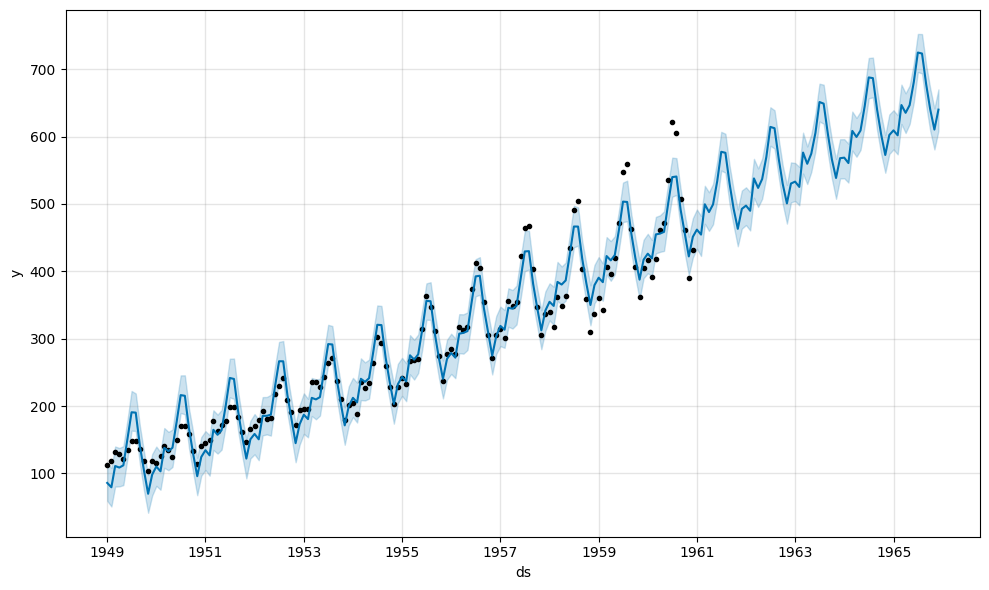

In [18]:
model.plot(forecast)
pyplot.show()

## Mean Absolute Error

Evaluate the model calculating MAE.

This can be done by holding back last few months of data during training and predict for the same duration using our model. As the values for the last 12 months are already known to us, we can calculate the error between the predictions and actual values.

10:39:21 - cmdstanpy - INFO - Chain [1] start processing
10:39:21 - cmdstanpy - INFO - Chain [1] done processing


MAE: 33.441686851052175


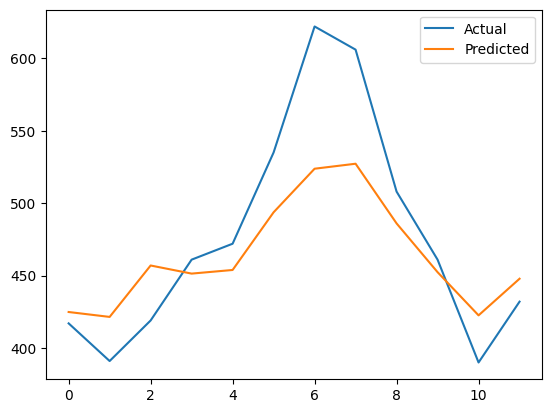

In [23]:
model = Prophet()

exclude_last_12months = df[:132]
last_12months = df[132:]
model.fit(exclude_last_12months)

forecast = model.predict(last_12months)

y_true = df['y'][132:].values
y_pred = forecast['yhat'].values

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f"MAE: {mae}")

pyplot.plot(y_true, label="Actual")
pyplot.plot(y_pred, label="Predicted")
pyplot.legend()
pyplot.show()

# Moar tutorials

* https://pbpython.com/prophet-overview.html
* https://www.kaggle.com/code/sudosudoohio/forecasting-web-traffic-with-prophet-in-python/notebook
* GOLD: https://mkang32.github.io/python/2020/12/15/prophet-intro.html

# Try with synthethic data

In [7]:
from pandas import read_csv
from matplotlib import pyplot

df = read_csv('./data_test/output_synthetic_dataset.csv')
df.head()

,time,flow
0,2022-01-01T00:00:00Z,83.691355
1,2022-01-01T00:05:00Z,63.979879
2,2022-01-01T00:10:00Z,55.538117
3,2022-01-01T00:15:00Z,58.204918
4,2022-01-01T00:20:00Z,66.298231


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104832 entries, 0 to 104831
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    104832 non-null  object 
 1   flow    104832 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


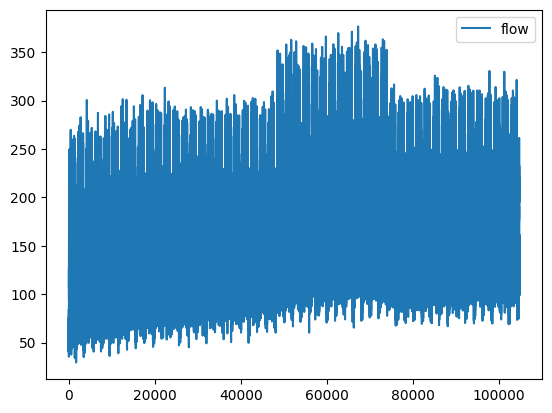

In [9]:
df.plot()
pyplot.show()
# X axis are months

## Fitting the model

In [14]:
from pandas import to_datetime

df.columns = ['ds', 'y']        # Fixed by prophet
df['ds'] = to_datetime(df['ds'])    # Force convert month to datetime object
df['ds'] = df['ds'].dt.tz_convert(None)
df.head()

,ds,y
0,2022-01-01 00:00:00,83.691355
1,2022-01-01 00:05:00,63.979879
2,2022-01-01 00:10:00,55.538117
3,2022-01-01 00:15:00,58.204918
4,2022-01-01 00:20:00,66.298231


In [15]:
from prophet import Prophet

# Time spend: 1m 20s
model = Prophet()
model.fit(df)

09:36:37 - cmdstanpy - INFO - Chain [1] start processing
09:37:54 - cmdstanpy - INFO - Chain [1] done processing


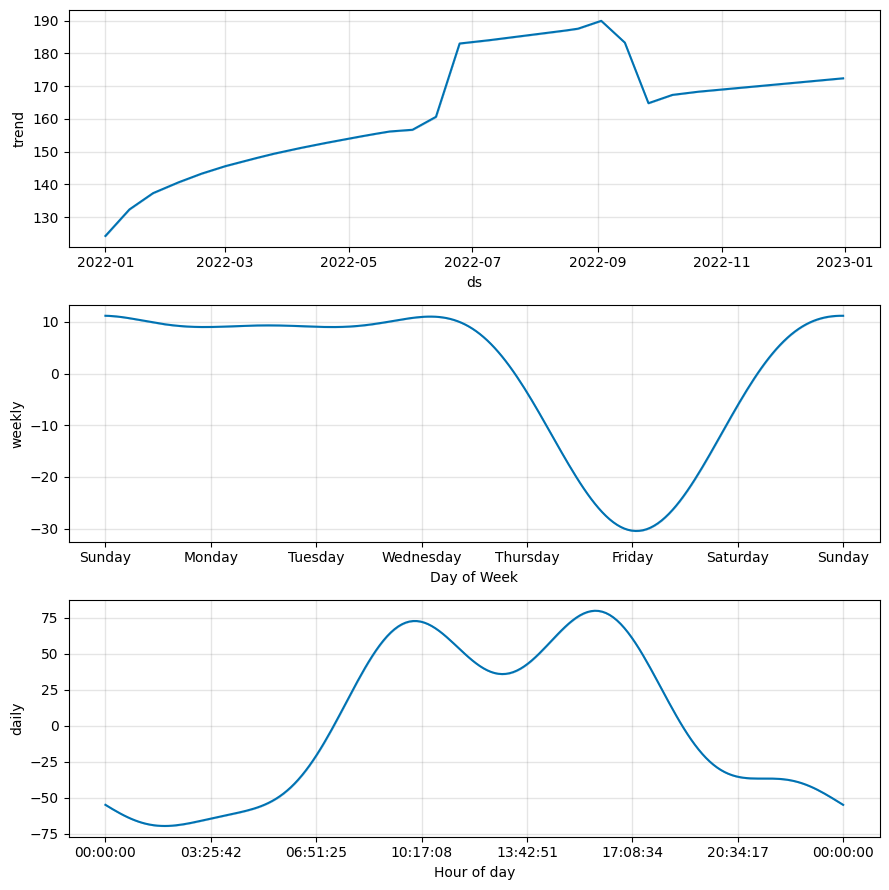

In [16]:
# Time spend 28.8 seg
model.plot_components(model.predict(df))
pyplot.show()

## Forecast inside data

In [19]:
last_12months = df[100:]
forecast = model.predict(last_12months)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds        yhat  yhat_lower  yhat_upper
0 2022-01-01 08:20:00  164.782925  140.811413  189.952686
1 2022-01-01 08:25:00  167.985378  141.948604  194.855776
2 2022-01-01 08:30:00  171.105114  146.638344  198.300738
3 2022-01-01 08:35:00  174.131093  148.977029  200.331680
4 2022-01-01 08:40:00  177.052601  151.315425  203.769679


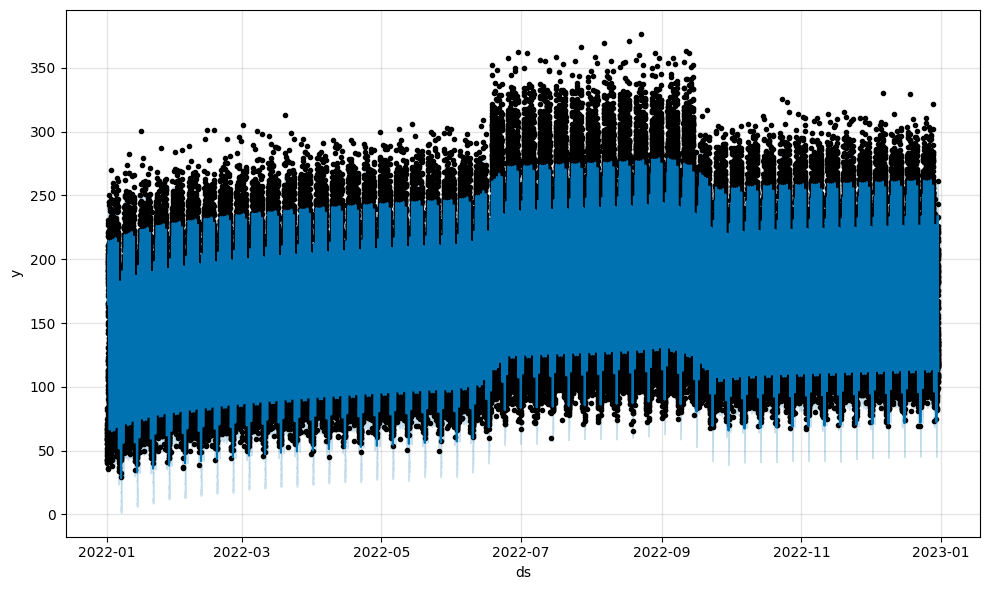

In [20]:
model.plot(forecast)
pyplot.show()

# dots -> training data
# blue -> forecast for last 12 months
# blue shaded -> upper and lower bounds (confidence)

In [23]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
104839,2023-07-31 23:55:00,139.858756,-86.006992,383.177138,184.605929,-48.360265,424.549851
104840,2023-08-31 23:55:00,102.187829,-178.571827,398.929819,186.380778,-90.533899,479.055936
104841,2023-09-30 23:55:00,145.475820,-183.372190,487.887210,188.098373,-134.819418,533.865554
104842,2023-10-31 23:55:00,147.019435,-229.012507,551.795681,189.873221,-186.512062,588.759866
104843,2023-11-30 23:55:00,107.397868,-312.471065,559.361609,191.590817,-234.608820,647.538955


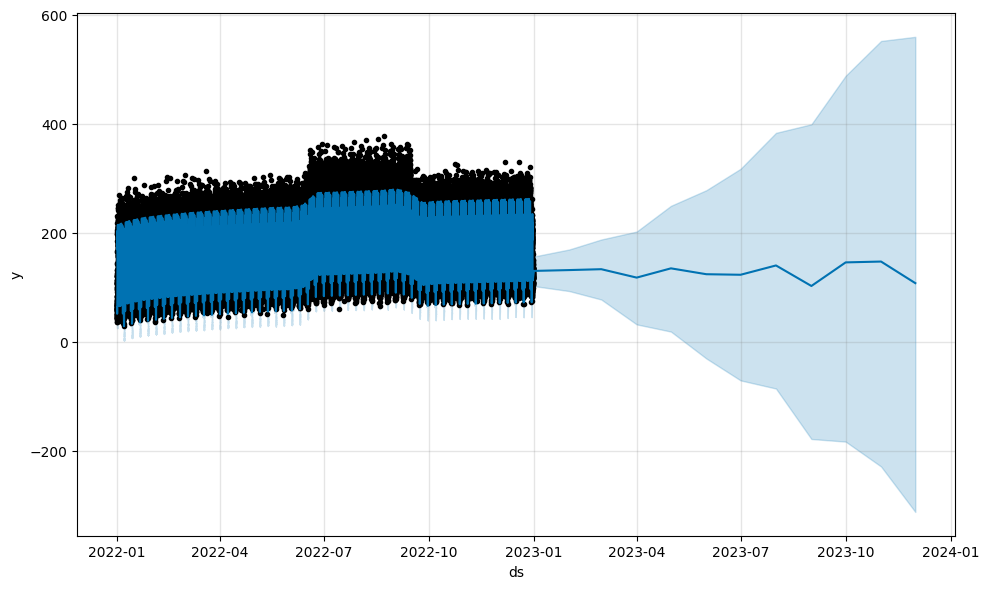

In [24]:
model.plot(forecast)
pyplot.show()

# Try with synthethic data (with percentile 95)

In [171]:
df = read_csv('./data_test/output_synthetic_dataset_per95.csv')

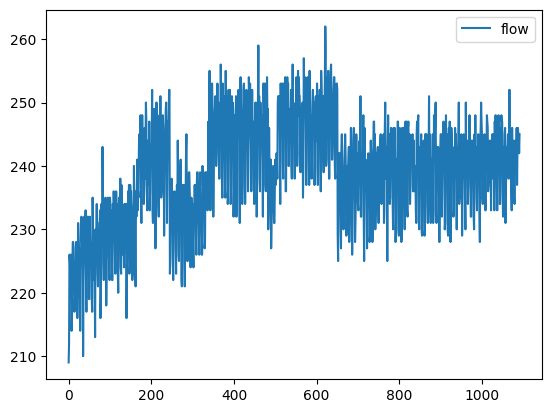

In [172]:
df.plot()
pyplot.show()
# X axis are months

## Fitting the model

In [173]:
from pandas import to_datetime

df.columns = ['ds', 'y']        # Fixed by prophet
df['ds'] = to_datetime(df['ds'])    # Force convert month to datetime object
df['ds'] = df['ds'].dt.tz_convert(None)
df.head()
df.tail()

,ds,y
1087,2024-12-23,246.0
1088,2024-12-24,245.0
1089,2024-12-25,245.0
1090,2024-12-26,242.0
1091,2024-12-27,245.0


In [174]:
model = Prophet(#changepoint_prior_scale=0.2, 
                #seasonality_mode='multiplicative',
                #changepoint_range=0.9
                )
model.fit(df)

15:28:57 - cmdstanpy - INFO - Chain [1] start processing
15:28:58 - cmdstanpy - INFO - Chain [1] done processing


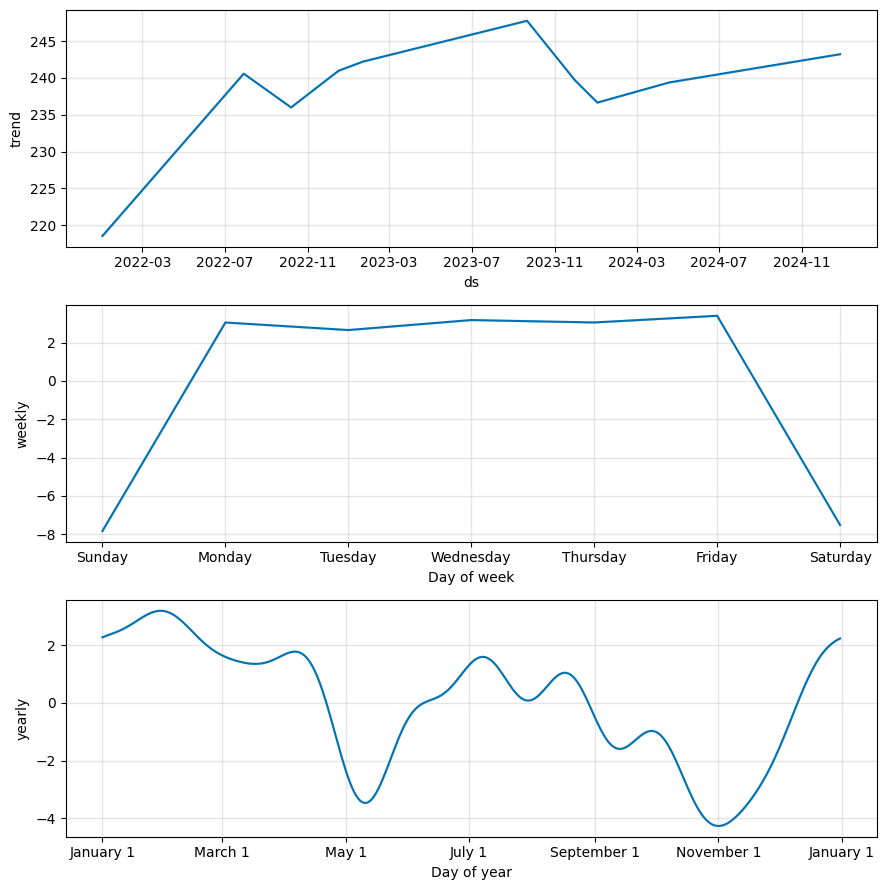

In [175]:
model.plot_components(model.predict(df))
pyplot.show()

## Forecast one year

In [164]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
1207,2025-04-22,241.307754,211.563571,270.979597,237.449200,208.372626,267.166724
1208,2025-04-23,241.712704,212.154506,271.199391,237.447022,208.218888,267.264794
1209,2025-04-24,240.587487,210.585710,271.790810,237.444843,208.065151,267.362864
1210,2025-04-25,240.819272,210.875754,271.544627,237.442664,207.911413,267.483719
1211,2025-04-26,230.501170,201.035183,260.744350,237.440486,207.799387,267.630064


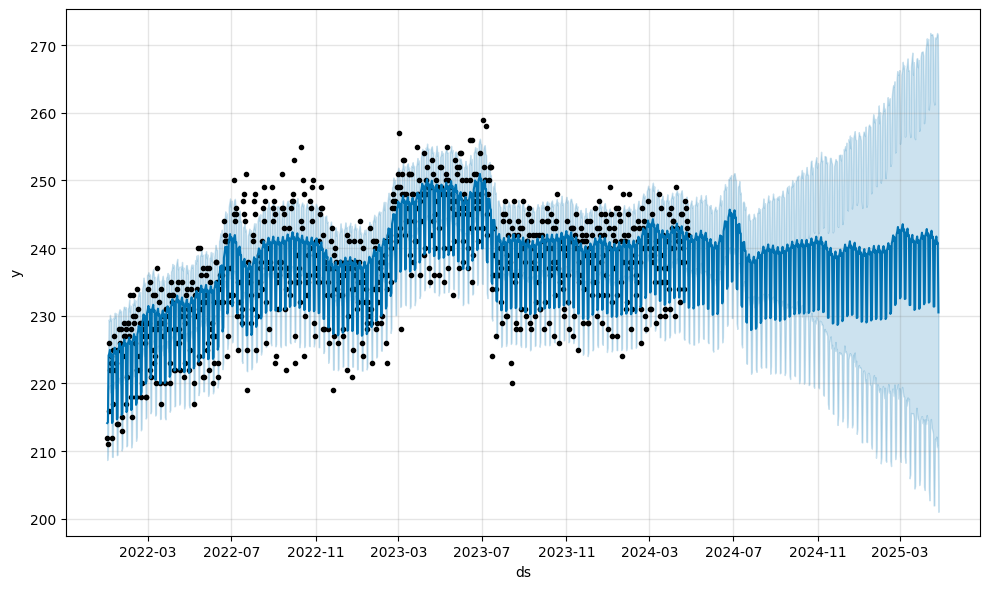

In [165]:
model.plot(forecast)
pyplot.show()